In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Create dataset 

In [3]:
np.random.seed(42)

In [4]:
x = np.random.randn(50)
true_w = 3
true_b =5


In [5]:
noise = np.random.randn(50)*0.3
y = true_w*x + true_b + noise

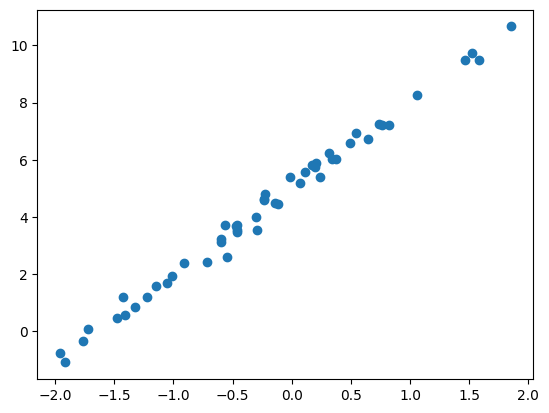

In [6]:
import matplotlib.pyplot as plt
plt.scatter(x,y)
plt.show()

For Ordinary Least Squares

In [7]:
def compute_coef(x,y):
    n = len(x)
    x_mean = np.mean(x)
    y_mean = np.mean(y)

    num = 0.0
    den = 0.0
    for i in range(n):
        num += (x[i] - x_mean)*(y[i]-y_mean)
        den += (x[i]-x_mean)
    slope = num/den
    intercept = y_mean - slope*x_mean
    return slope, intercept

In [8]:
def predict(w0,w1,x):
    return w1*x+w0

In [9]:
w1,w0 = compute_coef(x,y)
y_hat = predict(w0,w1,x)
print(w1,w0)

1.1661284357780298e+17 2.6293153244510644e+16


In [11]:
import math
def rmse(actual, predicted):
    sum_err = 0.0
    for y , y_hat in zip(actual.predicted):
        pred_error = y-y_hat
        sum_err += (pred_error**2)
    mean_error = sum_err/float(len(actual))
    return sqrt(mean_error)

In [12]:
def eval_ols(y,y_hat):
    mse = np.mean((y-y_hat)**2)
    return mse, np.sqrt(mse)
print(eval_ols(y,y_hat))

(np.float64(1.161728176885662e+34), np.float64(1.0778349488143637e+17))


Gradient Descent

In [13]:
def initialize(dim):
    w1 = np.random.randn(dim)
    w0 = np.random.randn()
    return w1, w0

In [14]:
def compute_cost(x,y,y_hat):
    n = len(y)
    cost = (1/2*n)*np.sum(np.square(y_hat-y))
    return cost

In [15]:
def predict(x,w1,w0):
    if len(w1)==1:
        w1 = w1[0]
        return x*w1+w0
    return np.dot(x,w1)+w0

In [16]:
def update_params(x,y,y_hat,cost,w0,w1,learning_rate):
    n = len(y)
    db = (np.sum(y_hat-y))/n
    dw = np.dot(y_hat-y,x)/n

    w0_new = w0 - learning_rate*db
    w1_new = w1 - learning_rate*dw
    return w0_new, w1_new

In [28]:
def run_gd(x,y,alpha,max_iterations,stopping_threshold = 1e-6):
    dims= 1
    if len(x.shape)>1:
        dims = X.shape()
    w1,w0 = initialize(dims)
    prev = None
    cost_hist = np.zeros(max_iterations)
    for itr in range(max_iterations):
        y_hat=predict(x,w1,w0)
        cost=compute_cost(x,y,y_hat)
        if prev and abs(prev-cost)<=stopping_threshold:
          break
        cost_hist[itr]=cost
        prev_cost = cost
        old_w1=w1
        old_w0=w0
        w0,w1=update_params(x,y,y_hat,cost,old_w0,old_w1,alpha)

    return w0,w1,cost_hist

In [41]:
learning_rate = 0.02
iterations = 250
print(x.shape,y.shape)

w0,w1,cost_history = run_gd(x,y,learning_rate,iterations)
print(w0,w1)

(50,) (50,)
4.915327281051862 [2.92413308]


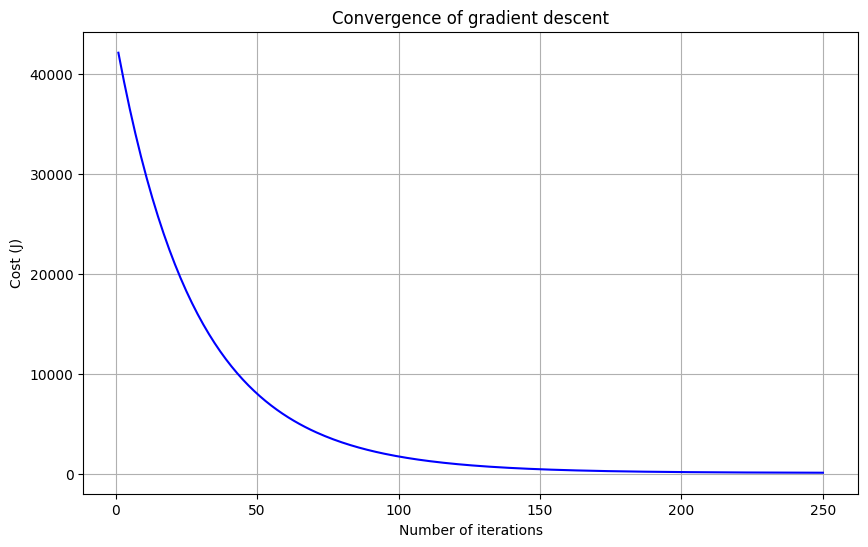

In [42]:
import numpy as np
import matplotlib.pyplot as plt
# Plot the cost history
plt.plot(range(1, iterations + 1), cost_history, color='blue')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent')
plt.show()

In [43]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x.reshape(-1,1), y)

print(model.intercept_, model.coef_)

5.012306521636039 [3.03092269]
